<a href="https://colab.research.google.com/github/Basel-byte/Speech-Emotion-Recognition/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from scipy.io import wavfile
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_path = "/content/drive/MyDrive/Crema"
if not os.path.exists(dir_path):
  !unzip /content/drive/MyDrive/Crema.zip -d /content/drive/MyDrive/Crema

In [23]:
labels = []
audio_waves = []
for file_name in os.listdir(dir_path):
  labels.append(file_name[9:12])
  audio_waves.append(librosa.load(os.path.join(dir_path, file_name)))
print(labels)
lb = LabelBinarizer()
encoded_labels = lb.fit_transform(labels)
print(encoded_labels.shape)
lb.classes_

['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'ANG', 'ANG', 'DIS', 'DIS', 'DIS', 'FEA', 'FEA', 'FEA', 'HAP', 'HAP', 'HAP', 'NEU', 'SAD', 'SAD', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'ANG', 'ANG', 'DIS', 'DIS', 'DIS', 'FEA', 'FEA', 'FEA', 'HAP', 'HAP', 'HAP', 'NEU', 'SAD', 'SAD', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD', 'ANG', 'DIS', 'FEA'

array(['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'], dtype='<U3')

In [24]:
max_frames = 200
n_mfcc = 40
data = np.empty((len(labels), n_mfcc, max_frames))
for i, audio in enumerate(audio_waves):
  signal, sr = audio
  mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
  if mfccs.shape[1] < max_frames:
    mfccs = np.pad(mfccs, ((0, 0), (0, max_frames - mfccs.shape[1])), mode='constant')
  else:
    mfccs = mfccs[:, :max_frames]
  data[i] = mfccs

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(data, encoded_labels, test_size=0.3, stratify=encoded_labels, random_state=42)
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, test_size=0.05, stratify=train_labels, random_state=42)

22050
(40, 99)


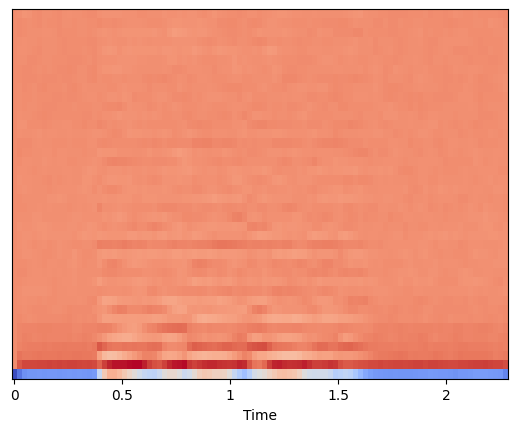

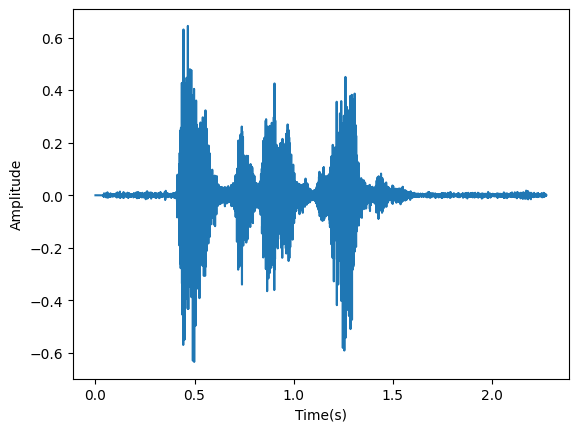

In [30]:
def visualize_audio_signal(audio_wave):
  signal, sr = audio_wave
  print(sr)
  mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
  print(mfccs.shape)
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  time = np.arange(0,len(signal)) / sr
  fig, ax = plt.subplots()
  ax.plot(time, signal)
  ax.set(xlabel='Time(s)',ylabel='Amplitude')
  plt.show()
  df = pd.DataFrame(mfccs)
  df

visualize_audio_signal(audio_waves[0])